In [1]:
from pylab import *
from matplotlib import cm

In [2]:
def Pot_R(th,V0=1,N=50):
    pot = zeros(len(th))
    for n in range(N):
        pot += (4*V0*sin((2*n+1)*th))/((2*n+1)*pi)
    return -pot

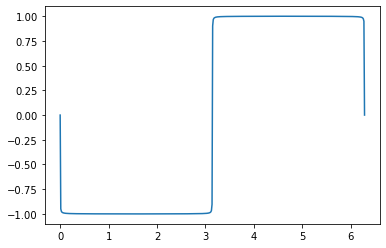

In [3]:
th = linspace(0,2*pi,500)
V = Pot_R(th,N=500)
plot(th,V)
show()

Potencial adentro:
$$
V_{adentro}(\rho , \theta) = -\sum _{n=0} ^{\infty} \frac{4V_0}{(2n+1)\pi}
\left( \frac{\rho}{R} \right) ^{2n+1} \sin ((2n+1)\theta)
$$

Potencial afuera:

$$
V_{afuera}(\rho , \theta) = -\sum _{n=0} ^{\infty} \frac{4V_0}{(2n+1)\pi}
\left( \frac{R}{\rho} \right) ^{2n+1} \sin ((2n+1)\theta)
$$

In [4]:
def Pot_xy(x,y,V0=1,R=1,N=50):
    Nx , Ny = len(x) , len(y)
    pot = zeros( (Nx,Ny) )
    for i in range(Nx):
        for j in range(Ny):
            rho = sqrt( x[i]**2 + y[j]**2 )
            th = arctan2( y[j], x[i])
            for n in range(N):
                if rho > R:
                    pot[j,i] += (4*V0*(R**(2*n+1))*sin((2*n+1)*th))/((2*n+1)*pi*(rho**(2*n+1)))
                elif rho <= R:
                    pot[j,i] += (4*V0*(rho**(2*n+1))*sin((2*n+1)*th))/((2*n+1)*pi*(R**(2*n+1)))
    return -pot

In [5]:
x , y = linspace(-5,5,200) , linspace(-5,5,200)
V = Pot_xy(x,y,N=200)

/var/folders/18/578bmq497474x5l7rkl76k7h0000gn/T/ipykernel_2061/119006467.py:10: RuntimeWarning: overflow encountered in double_scalars
  pot[j,i] += (4*V0*(R**(2*n+1))*sin((2*n+1)*th))/((2*n+1)*pi*(rho**(2*n+1)))


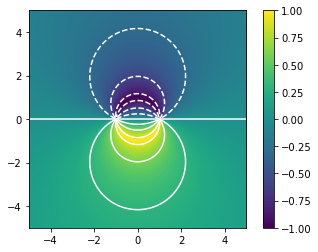

In [6]:
imshow(V,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
XX , YY = meshgrid(x,y)
contour(XX,YY,V,colors='white')
gca().set_aspect('equal')
show()

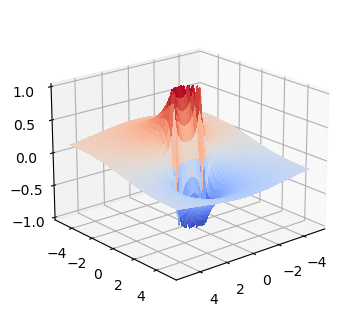

In [7]:
figura , ejes = subplots(subplot_kw={"projection":"3d"},dpi=100)
ejes.plot_surface(XX,YY,V,cmap=cm.coolwarm,antialiased=False)
ejes.view_init(20,50)
show()

In [8]:
x , y = linspace(-1.05,1.05,100) , linspace(-1.05,1.05,100)
V = Pot_xy(x,y,N=500)

/var/folders/18/578bmq497474x5l7rkl76k7h0000gn/T/ipykernel_2061/1296372353.py:7: UserWarning: No contour levels were found within the data range.
  contour(XX,YY,V,colors='red',levels=frontera)
/var/folders/18/578bmq497474x5l7rkl76k7h0000gn/T/ipykernel_2061/1296372353.py:10: UserWarning: No contour levels were found within the data range.
  contour(XX,YY,V,colors='blue',levels=frontera)


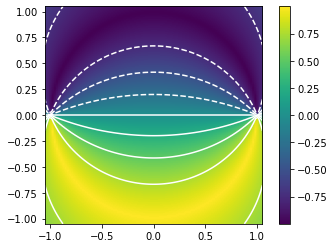

In [9]:
imshow(V,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
XX , YY = meshgrid(x,y)
contour(XX,YY,V,colors='white')

frontera = [-1]
contour(XX,YY,V,colors='red',levels=frontera)

frontera = [1]
contour(XX,YY,V,colors='blue',levels=frontera)

gca().set_aspect('equal')
show()

In [10]:
def malla_circ_dentro(x,y,r=1,V0=1):
    Nx , Ny = len(x) , len(y) # i,j
    malla = zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( x[i]**2 + y[j]**2) >= r and y[j]>=0:
                malla[j,i] = -1
            elif sqrt( x[i]**2 + y[j]**2) >= r and y[j]<=0:
                malla[j,i] = 1
            else:
                malla[j,i] = V0*rand()
    return malla

def Relajar(x,y,V,r=1,V0=1):
    Nx , Ny = len(x) , len(y)
    for i in range(Nx):
        for j in range(Ny):
            if sqrt( x[i]**2 + y[j]**2) < r:
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V

def Met_jacob(x,y,V,r=1,V0=1,error=1e-4):
    D_max = [] # Esta variable no es necesario, solo para ver la convergencia
    diferencia , contador = 1 , 0
    while diferencia > error:
        V_old = copy(V)
        V = Relajar(x,y,V)
        diferencia = abs(V-V_old).max()
        contador +=1
        D_max.append(diferencia)
    print('Iteraciones: ',contador)
    return V , D_max

In [11]:
#Ojo hay que cambiar x , y por los anteirores
#x , y = linspace(-1.1,1.1,50) , linspace(-1.1,1.1,50)
V_num = malla_circ_dentro(x,y)

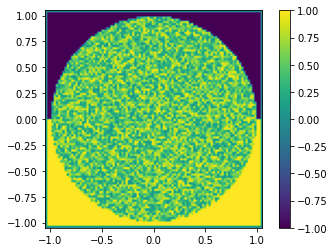

In [12]:
imshow(V_num,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
gca().set_aspect('equal')
show()

In [13]:
V_num , diferencias = Met_jacob(x,y,V_num,error=1e-5)

Iteraciones:  3647


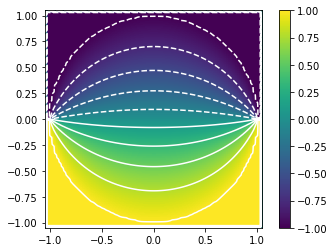

In [14]:
imshow(V_num,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
XX , YY = meshgrid(x,y)
niveles_num = linspace(-0.99,0.99,10)
contour(XX,YY,V_num,colors='white',levels=niveles_num)

gca().set_aspect('equal')
show()

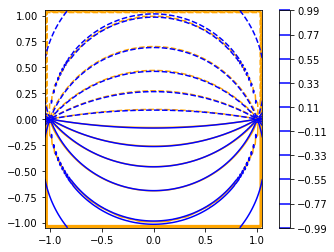

In [15]:
niveles = linspace(-0.99,0.99,10)
contour(XX,YY,V_num,colors='orange',levels=niveles)
contour(XX,YY,V,colors='blue',levels=niveles)

colorbar()

gca().set_aspect('equal')
show()

In [16]:
def filtro(x,y,V1,V2,r=1):
    D_V = zeros((len(x),len(y)))
    Nx , Ny = len(x) , len(y)
    for i in range(Nx):
        for j in range(Ny):        
            if  sqrt(x[i]**2 + y[j]**2) < r:
                D_V[j,i] = abs(V1[j,i] - V2[j,i])
    return D_V

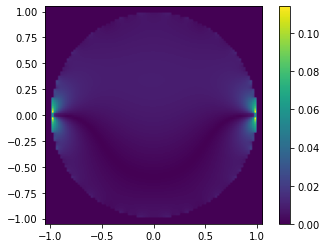

In [20]:
D_V = filtro(x,y,V,V_num,r=1)
imshow(D_V,extent=[x[0],x[-1],y[0],y[-1]],origin='lower')
colorbar()
show()

In [18]:
D_V.max()

0.11405588016627943